## Importing libraries.

In [1]:
#---- Operating System & Data Handling ----#
import os
import pandas as pd
import numpy as np

#---- Visualization ----#
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

#---- Model Selection and Evaluation ----#
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#---- Data Preprocessing ----#
from sklearn.preprocessing import StandardScaler

#---- Statistical Model & Feature Selection ----#
import statsmodels.formula.api as sm
import statsmodels.api as sm
from sklearn.feature_selection import RFE

#---- Machine Learning Algorithms ----#
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#---- Model Evaluation Metrics ----#
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

#----Visualization Settings----#
%matplotlib inline

## directory and path

In [2]:
os.chdir(r"C:\Users\Administrator\Desktop\Vaibhav\Machine Learning\Datasets")

In [3]:
data = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Data view

In [4]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [5]:
print ("Missing values :\n\n", data.isnull().sum().sort_values(ascending=False))

Missing values :

 ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


In [6]:
print ("Rows     : " , data.shape[0])
print ("Columns  : " , data.shape[1])

Rows     :  5000
Columns  :  14


## Data Structure

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


## Data Preprocessing 

In [8]:
data.drop(['ID','ZIP Code'],axis=1,inplace=True)

In [9]:
category_col = ['Family','Education']
data[category_col] = data[category_col].astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   object 
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   object 
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 468.9+ KB


## Exploratory Data Analysis

In [10]:
data.describe()

,Age,Experience,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,1.937938,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1.747659,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,0.700000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,1.500000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,2.500000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,10.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [11]:
data = pd.get_dummies(data, columns=['Education', 'Family'])
data.head()

,Age,Experience,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3,Family_1,Family_2,Family_3,Family_4
0,25,1,49,1.6,0,0,1,0,0,0,1,0,0,0,0,0,1
1,45,19,34,1.5,0,0,1,0,0,0,1,0,0,0,0,1,0
2,39,15,11,1.0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,35,9,100,2.7,0,0,0,0,0,0,0,1,0,1,0,0,0
4,35,8,45,1.0,0,0,0,0,0,1,0,1,0,0,0,0,1


## train and test

In [12]:
y=data['Personal Loan']
print(y.unique())
X=data.drop(['Personal Loan'],axis=1)
X.head()

[0 1]


,Age,Experience,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3,Family_1,Family_2,Family_3,Family_4
0,25,1,49,1.6,0,1,0,0,0,1,0,0,0,0,0,1
1,45,19,34,1.5,0,1,0,0,0,1,0,0,0,0,1,0
2,39,15,11,1.0,0,0,0,0,0,1,0,0,1,0,0,0
3,35,9,100,2.7,0,0,0,0,0,0,1,0,1,0,0,0
4,35,8,45,1.0,0,0,0,0,1,0,1,0,0,0,0,1


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [14]:
logreg = LogisticRegression()
rfe = RFE(logreg, )
rfe = rfe.fit(X_train, y_train.values.ravel())
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

[('Age', False, 6),
 ('Experience', False, 7),
 ('Income', False, 8),
 ('CCAvg', False, 2),
 ('Mortgage', False, 9),
 ('Securities Account', True, 1),
 ('CD Account', True, 1),
 ('Online', False, 3),
 ('CreditCard', True, 1),
 ('Education_1', True, 1),
 ('Education_2', True, 1),
 ('Education_3', True, 1),
 ('Family_1', True, 1),
 ('Family_2', True, 1),
 ('Family_3', False, 4),
 ('Family_4', False, 5)]

In [15]:
print(X_train.columns[rfe.support_])
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe = sm.add_constant(X_train_rfe)

Index(['Securities Account', 'CD Account', 'CreditCard', 'Education_1',
       'Education_2', 'Education_3', 'Family_1', 'Family_2'],
      dtype='object')


In [16]:
model = sm.Logit(y_train, X_train_rfe)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.255435
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3492
Method:                           MLE   Df Model:                            7
Date:                Fri, 22 Dec 2023   Pseudo R-squ.:                  0.1822
Time:                        21:53:43   Log-Likelihood:                -894.02
converged:                       True   LL-Null:                       -1093.2
Covariance Type:            nonrobust   LLR p-value:                 5.366e-82
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.6389        nan        nan        nan         nan         nan
Securities Account    -1.4399      0.260     -5.530      0.000      -1.950      -0.930
CD Account             3.9666      0.258     15.369      0.000       3.461       4.472
CreditCard            -1.1929      0.195     -6.110      0.000      -1.576      -0.810
Education_1           -1.4604        nan        nan        nan         nan         nan
Education_2           -0.1620        nan        nan        nan         nan         nan
Education_3           -0.0164        nan        nan        nan         nan         nan
Family_1              -0.4864      0.158     -3.070      0.002      -0.797      -0.176
Family_2              -0.1574      0.158     -0.995      0.320      -0.467       0.153
======================================================================================
"""

In [17]:
X_train_rfe = X_train_rfe.drop(['Education_1', 'Education_3'], axis = 1)
model = sm.Logit(y_train, X_train_rfe)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.266529
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3493
Method:                           MLE   Df Model:                            6
Date:                Fri, 22 Dec 2023   Pseudo R-squ.:                  0.1467
Time:                        21:53:43   Log-Likelihood:                -932.85
converged:                       True   LL-Null:                       -1093.2
Covariance Type:            nonrobust   LLR p-value:                 2.988e-66
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.2649      0.111    -20.332      0.000      -2.483      -2.047
Securities Account    -1.4654      0.253     -5.791      0.000      -1.961      -0.969
CD Account             3.8439      0.249     15.441      0.000       3.356       4.332
CreditCard            -1.2018      0.193     -6.225      0.000      -1.580      -0.823
Education_2            0.4929      0.132      3.745      0.000       0.235       0.751
Family_1              -0.4652      0.156     -2.985      0.003      -0.771      -0.160
Family_2              -0.2311      0.156     -1.486      0.137      -0.536       0.074
======================================================================================
"""

In [18]:
logreg = LogisticRegression()
logreg.fit(X_train_rfe, y_train)
X_test = sm.add_constant(X_test)
X_test_rfe = X_test.filter(list(X_train_rfe.columns))
y_pred = logreg.predict(X_test_rfe)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_rfe, y_test)))

Accuracy of logistic regression classifier on test set: 0.91


In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1326   24]
 [ 118   32]]


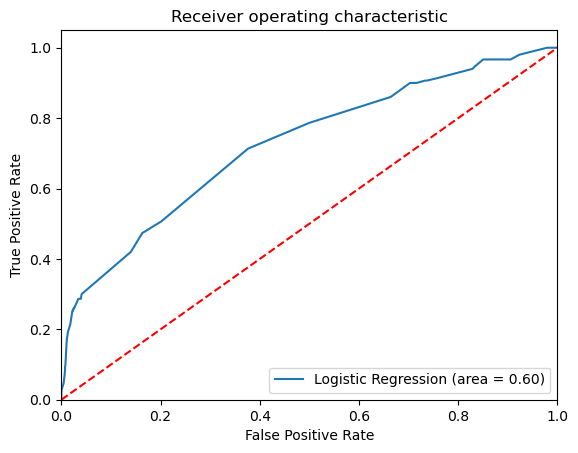

In [20]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test_rfe))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test_rfe)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [21]:
y=data['Personal Loan']
print(y.unique())
X=data.drop(['Personal Loan'],axis=1)
X.head()

[0 1]


,Age,Experience,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3,Family_1,Family_2,Family_3,Family_4
0,25,1,49,1.6,0,1,0,0,0,1,0,0,0,0,0,1
1,45,19,34,1.5,0,1,0,0,0,1,0,0,0,0,1,0
2,39,15,11,1.0,0,0,0,0,0,1,0,0,1,0,0,0
3,35,9,100,2.7,0,0,0,0,0,0,1,0,1,0,0,0
4,35,8,45,1.0,0,0,0,0,1,0,1,0,0,0,0,1


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [23]:
logreg = LogisticRegression()
rfe = RFE(logreg, )
rfe = rfe.fit(X_train, y_train.values.ravel())
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

[('Age', False, 7),
 ('Experience', False, 6),
 ('Income', False, 8),
 ('CCAvg', True, 1),
 ('Mortgage', False, 9),
 ('Securities Account', True, 1),
 ('CD Account', True, 1),
 ('Online', False, 3),
 ('CreditCard', True, 1),
 ('Education_1', True, 1),
 ('Education_2', False, 2),
 ('Education_3', True, 1),
 ('Family_1', True, 1),
 ('Family_2', True, 1),
 ('Family_3', False, 4),
 ('Family_4', False, 5)]

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
data[data['Experience'] < 0]['Experience'].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

In [26]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [27]:
y_pred = knn.predict(X_test)

In [28]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9513333333333334


In [29]:
print('Precision: %.3f' % precision_score(y_test, y_pred))

Precision: 0.887


In [30]:
print('Recall: %.3f' % recall_score(y_test, y_pred))

Recall: 0.581


In [31]:
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

F1 Score: 0.702


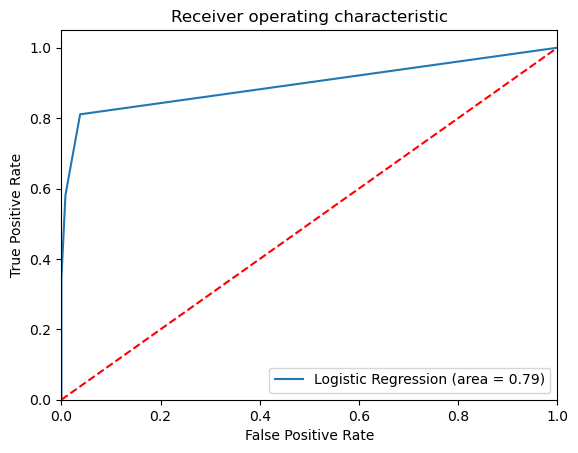

In [32]:
knn_roc_auc = roc_auc_score(y_test, knn.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Cross-Validation for Different K Values:

Text(0, 0.5, 'Accuracy Score')

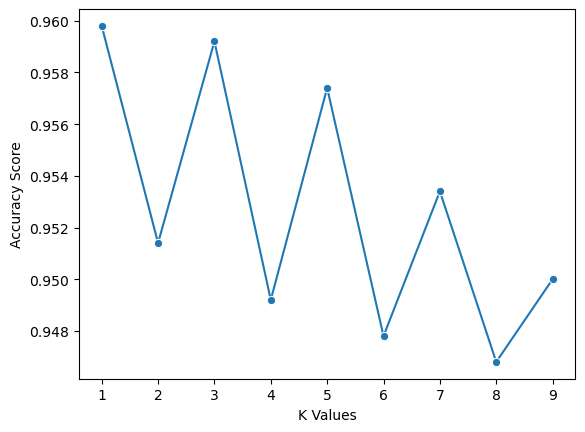

In [33]:
k_values = [i for i in range(1, 10)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

sns.lineplot(x=k_values, y=scores, marker='o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [34]:
from sklearn.metrics import confusion_matrix # why 
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1341   11]
 [  62   86]]


In [35]:
# def convert_columns_to_object(dataframe, column_names):
#     dataframe[column_names] = dataframe[column_names].astype(str)
    
#     return dataframe